<a href="https://colab.research.google.com/github/SathishMG-23/employee_salary_analysis/blob/main/employee's_salary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Employee Salaries Analysis**
  - By Sathish
  - Data Analyst
  - Bangalore, India.
  - 11/04/2024
  - sathishgudri@gmail.com

In [47]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
# mounting google drive to get the dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
employee_salaries = pd.read_csv('/content/drive/MyDrive/Data Analytics Projects Data/employee_salaries/Employee_Salaries.csv')

# Data Cleaning and Pre-processing

In [50]:
employee_salaries.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
dtype: object

In [51]:
employee_salaries.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [52]:
employee_salaries.tail()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.0,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.0,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.0,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.0,1596.27,N21
10290,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,177976.3100,0.0,0.00,N35


In [131]:
print(f'Shape:{employee_salaries.shape}')
print(f'Cloumns: {employee_salaries.columns}')

Shape:(9674, 8)
Cloumns: Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')


In [54]:
employee_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [55]:
employee_salaries.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,10291.000000,10291.000000,10291.000000
mean,90312.165744,8081.288954,1533.882816
std,31240.842929,16491.833017,3209.041070
min,11147.240000,0.000000,0.000000
25%,70023.000000,0.000000,0.000000
50%,87328.000000,258.420000,0.000000
75%,108084.000000,9190.970000,1225.680000
max,292000.000000,227428.990000,20279.460000


- Identifying and treating null values

In [56]:
total = employee_salaries.isnull().sum()
percent = (employee_salaries.isnull().sum()/len(employee_salaries))*100
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percentage'])
missing_data.sort_values(by = 'Total',ascending = False)

,Total,Percentage
Grade,33,0.320669
Department,0,0.000000
Department_Name,0,0.000000
Division,0,0.000000
Gender,0,0.000000
Base_Salary,0,0.000000
Overtime_Pay,0,0.000000
Longevity_Pay,0,0.000000


There are 33 missing values in the column 'Grade'. I choose mode imputation technique to fill these na values.

In [57]:
mode = employee_salaries['Grade'].mode()[0]
mode

'T1'

In [58]:
# mode imputation

employee_salaries['Grade'] = employee_salaries['Grade'].fillna(value = mode)
employee_salaries.isna().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

- Checking & removing dublicate records from the dataset

In [59]:
employee_salaries.duplicated().sum()

617

In [60]:
# Removing all the duplicates
employee_salaries = employee_salaries.drop_duplicates()
employee_salaries.duplicated().sum()

0

In [61]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [62]:
employee_salaries.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


# **Analysis and Insights**

In [63]:
## Identifing the employees of the Company

In [64]:
# Department v/s Employee Counts

employee_salaries['Department'].unique()

array(['ABS', 'BOA', 'BOE', 'CAT', 'CCL', 'CEC', 'CEX', 'COR', 'CUS',
       'DEP', 'DGS', 'DHS', 'DOT', 'DPS', 'ECM', 'FIN', 'FRS', 'HCA',
       'HHS', 'HRC', 'IGR', 'LIB', 'MPB', 'NDA', 'OAG', 'OAS', 'OCP',
       'OFR', 'OGM', 'OHR', 'OIG', 'OLO', 'OLR', 'OMB', 'ORE', 'PIO',
       'POL', 'PRO', 'REC', 'SHF', 'TBS', 'ZAH'], dtype=object)

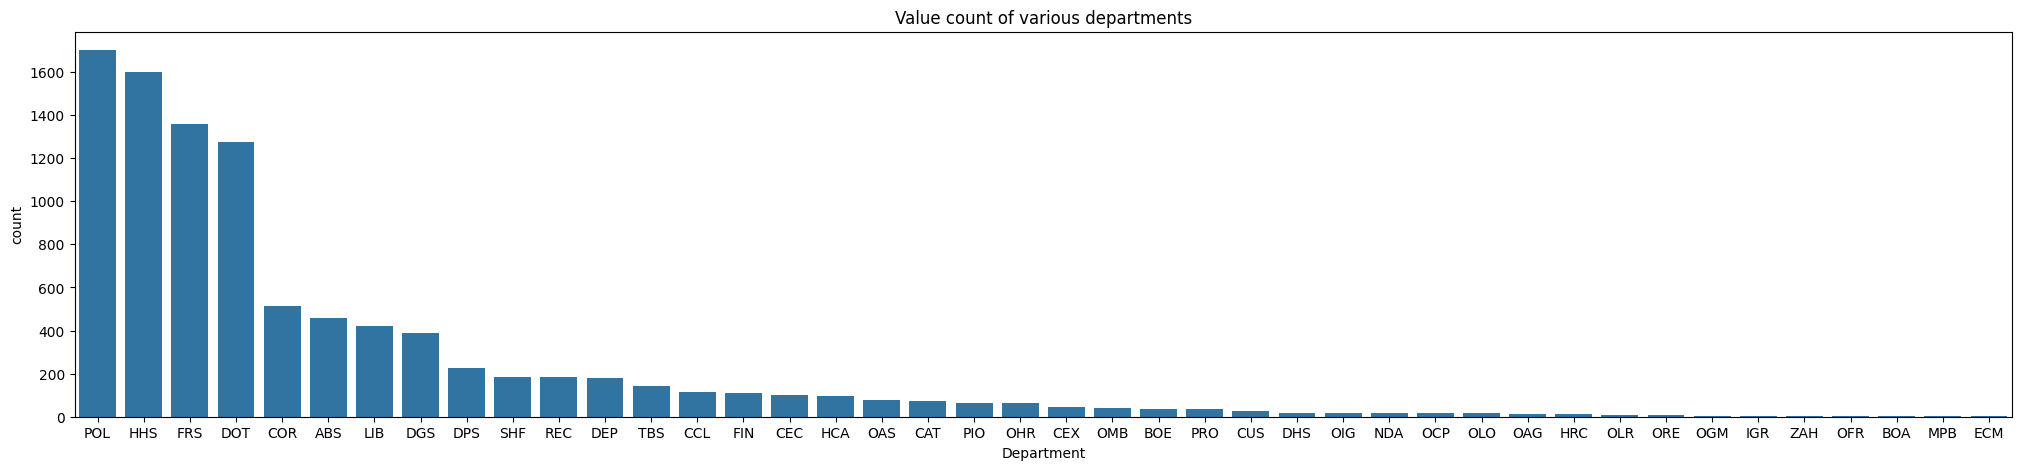

In [65]:
# Visualization

employee_count = employee_salaries.Department.value_counts()
plt.figure(figsize=(25,5))
sns.barplot(employee_count)
plt.title("Value count of various departments")
plt.show()

In [66]:
employee_count.loc[['POL', 'HHS','FRS','BOA','MPB','ECM']]

Department
POL    1702
HHS    1600
FRS    1361
BOA       3
MPB       2
ECM       2
Name: count, dtype: int64

Above figure denotes that -
  - Department "POL", "HHS", "FRS" contains most number of the employees of the Company.
  - Department "BOA", "MPB", "ECM" has the least number of employees.

In [67]:
# Gender v/s Total Employees

In [68]:
employee_salaries['Gender'].unique()

array(['M', 'F'], dtype=object)

<ipython-input-69-ec3ae4165357>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(employee_salaries['Gender'].value_counts(),palette=['royalblue','Orange'])


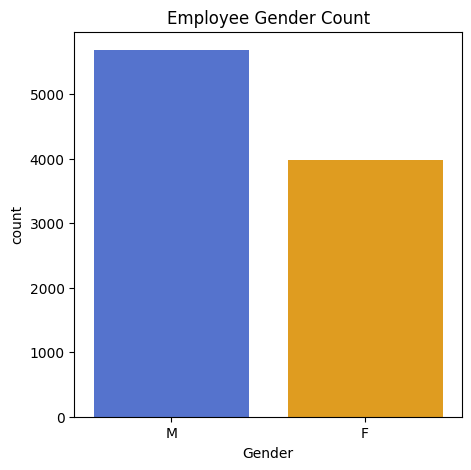

In [69]:
plt.figure(figsize = (5,5))
sns.barplot(employee_salaries['Gender'].value_counts(),palette=['royalblue','Orange'])
plt.title("Employee Gender Count")
plt.show()


In [70]:
count = employee_salaries.Gender.value_counts()
total = employee_salaries.Gender.count()
Percent = (count/total*100).round(2)
gender_count = pd.DataFrame({'count':count, 'Percent':Percent})
gender_count

,count,Percent
Gender,,
M,5687,58.79
F,3987,41.21


In [71]:
# Calculation of imbalance percentage between male and female employees.
(gender_count['count']['M']/gender_count['count']['F']).round(2)

1.43

The above analysis clarifies that -
  - Company has more male employees than females.
  - The imbalnce ratio between male and female is 1.43.

In [72]:
#average base salary v/s department

employee_salaries['Department'].unique()


array(['ABS', 'BOA', 'BOE', 'CAT', 'CCL', 'CEC', 'CEX', 'COR', 'CUS',
       'DEP', 'DGS', 'DHS', 'DOT', 'DPS', 'ECM', 'FIN', 'FRS', 'HCA',
       'HHS', 'HRC', 'IGR', 'LIB', 'MPB', 'NDA', 'OAG', 'OAS', 'OCP',
       'OFR', 'OGM', 'OHR', 'OIG', 'OLO', 'OLR', 'OMB', 'ORE', 'PIO',
       'POL', 'PRO', 'REC', 'SHF', 'TBS', 'ZAH'], dtype=object)

In [73]:
dep_avg_sal = (employee_salaries.groupby('Department')['Base_Salary'].mean()).round(2).sort_values(ascending = False)
dep_avg_sal

Department
IGR    165196.75
ZAH    143900.49
OLR    141485.29
ECM    141388.42
NDA    135776.82
OLO    133615.98
TBS    132176.57
CAT    130265.00
CEX    128811.64
OMB    127234.70
OIG    126224.10
ORE    122101.77
FIN    114253.15
DHS    113653.77
OFR    112777.67
OHR    109212.50
HRC    108182.20
OCP    106213.42
PRO    105796.36
OGM    104599.24
DEP    104563.72
BOA    104482.53
DPS    103980.58
HCA    102979.77
CCL    101172.05
OAG    100612.17
FRS     98188.56
POL     93917.51
CUS     93023.13
MPB     92906.85
DGS     91661.48
SHF     90298.36
HHS     88806.99
PIO     87183.62
BOE     85517.14
COR     84960.18
REC     84345.03
DOT     81622.49
OAS     76513.62
CEC     75934.32
ABS     64722.54
LIB     64620.24
Name: Base_Salary, dtype: float64

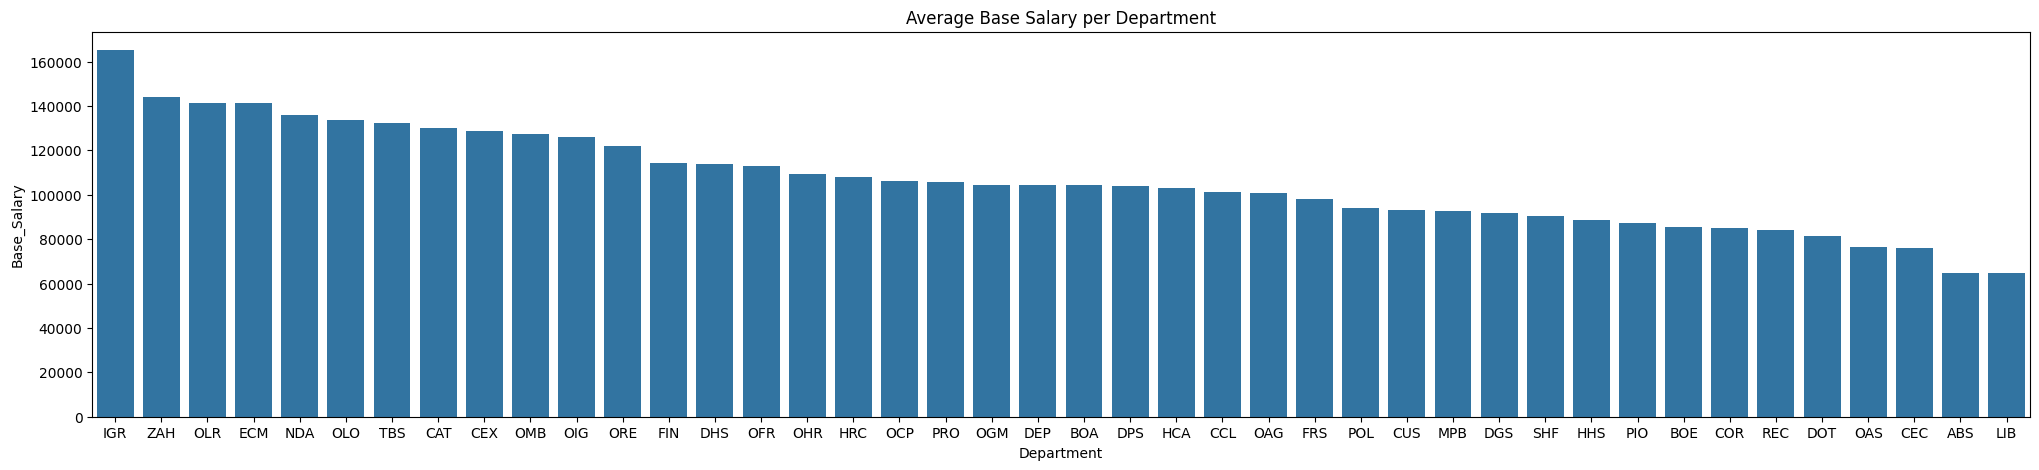

In [74]:
plt.figure(figsize=(25,5))
sns.barplot(dep_avg_sal)
plt.title("Average Base Salary per Department")
plt.show()

Department
IGR    165196.75
ZAH    143900.49
OLR    141485.29
ECM    141388.42
NDA    135776.82
Name: Base_Salary, dtype: float64


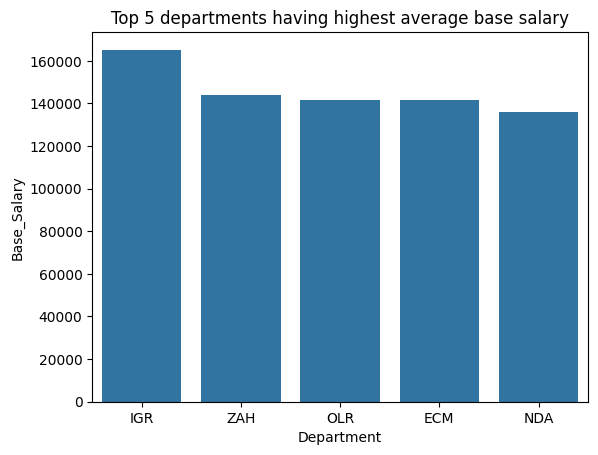

In [75]:
# Top 5 departments having highest average base salary

print(dep_avg_sal.loc[['IGR','ZAH','OLR','ECM','NDA']])
sns.barplot(dep_avg_sal.loc[['IGR','ZAH','OLR','ECM','NDA']])
plt.title("Top 5 departments having highest average base salary")
plt.show()

Department
LIB    64620.24
ABS    64722.54
CEC    75934.32
OAS    76513.62
DOT    81622.49
Name: Base_Salary, dtype: float64


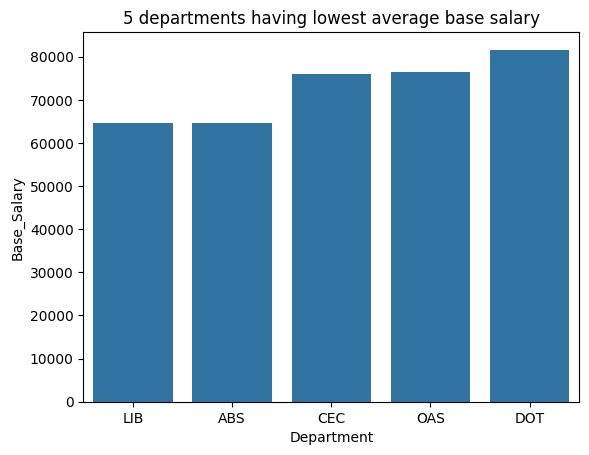

In [76]:
# Bottom 5 departments having lowest average base salary

print(dep_avg_sal.loc[['LIB','ABS','CEC','OAS','DOT']])
sns.barplot(dep_avg_sal.loc[['LIB','ABS','CEC','OAS','DOT']])
plt.title("5 departments having lowest average base salary")
plt.show()

In [77]:
# Understanding the correlation between the employee count and average base salary

Dep_sal_empCount = pd.DataFrame({'Average Base Salary':dep_avg_sal, 'Employee Count':employee_count})
Dep_sal_empCount.head()

,Average Base Salary,Employee Count
Department,,
ABS,64722.54,459
BOA,104482.53,3
BOE,85517.14,34
CAT,130265.00,74
CCL,101172.05,117


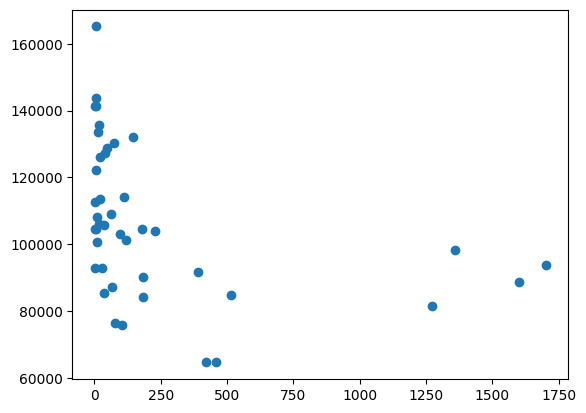

In [78]:

plt.scatter(Dep_sal_empCount['Employee Count'],Dep_sal_empCount['Average Base Salary'])

In [79]:
Dep_sal_empCount.corr(method ='pearson')

,Average Base Salary,Employee Count
Average Base Salary,1.000000,-0.379016
Employee Count,-0.379016,1.000000


In [80]:
# Understanding the salary gap between the Male and Female Employees within the same Department

# Department v/s gender v/s average base salary

m_sal = (employee_salaries[employee_salaries['Gender']=='M'].groupby(['Department'])['Base_Salary'].mean()).round(2)
f_sal = (employee_salaries[employee_salaries['Gender']=='F'].groupby(['Department'])['Base_Salary'].mean()).round(2)
dep_g_avg_sal = pd.DataFrame({'M':m_sal,'F':f_sal})
dep_g_avg_sal.head()

,M,F
Department,,
ABS,63172.82,70582.40
BOA,NaN,104482.53
BOE,81481.89,88702.86
CAT,151565.62,121825.13
CCL,98119.64,102818.75


In [81]:
# There are null values indicating employees with only one type of gender within the Department.
dep_g_avg_sal_null_m = dep_g_avg_sal['M'].isna()
dep_g_avg_sal_null_m = dep_g_avg_sal_null_m[dep_g_avg_sal_null_m==True]
dep_g_avg_sal_null_m

Department
BOA    True
IGR    True
ORE    True
ZAH    True
Name: M, dtype: bool

In [82]:
# the above 4 departments do not have any male employees. Lets see their employee counts.
dep_g_avg_sal_null_m = dep_g_avg_sal_null_m.reset_index()
employee_count.loc[dep_g_avg_sal_null_m['Department']]

Department
BOA    3
IGR    4
ORE    6
ZAH    4
Name: count, dtype: int64

In [83]:
dep_g_avg_sal_null_f = dep_g_avg_sal['F'].isna()
dep_g_avg_sal_null_f = dep_g_avg_sal_null_f[dep_g_avg_sal_null_f==True]
dep_g_avg_sal_null_f

Series([], Name: F, dtype: bool)

In [84]:
# Every department has atleast one female employee.

In [85]:
dep_g_avg_sal_no_null = dep_g_avg_sal.dropna()
dep_g_avg_sal_no_null = dep_g_avg_sal_no_null.reset_index()
dep_g_avg_sal_no_null.head()

,Department,M,F
0,ABS,63172.82,70582.40
1,BOE,81481.89,88702.86
2,CAT,151565.62,121825.13
3,CCL,98119.64,102818.75
4,CEC,72847.34,79759.48


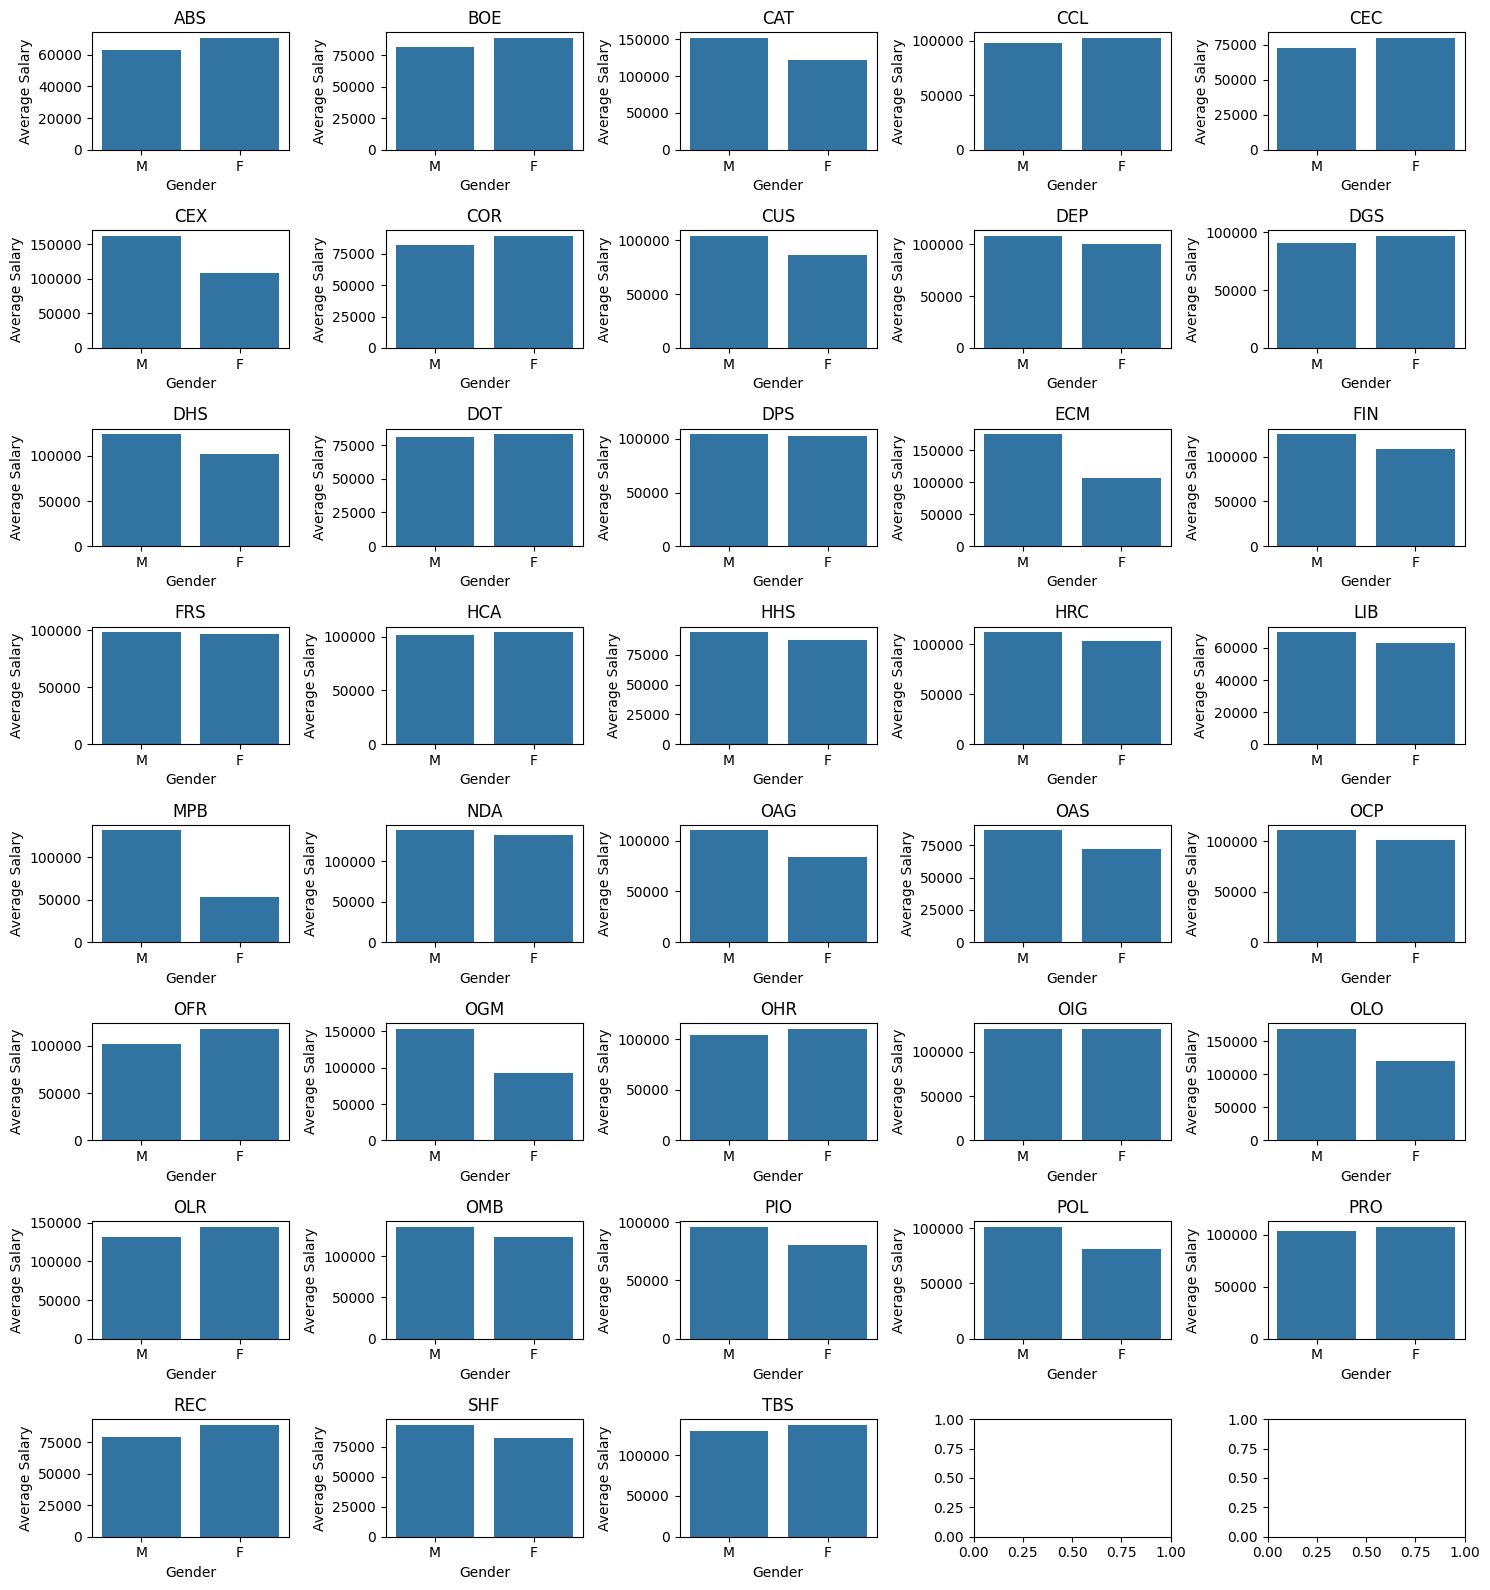

In [86]:
## Note: The below code is generated using AI modules and not out of my current knowledge of python.

# Set the Department column as the index
dep_g_avg_sal_no_null.set_index('Department', inplace=True)

# Get the number of departments
num_departments = len(dep_g_avg_sal_no_null)

# Calculate the number of rows needed for the subplots
num_rows = (num_departments + 4) // 5  # Add 4 and use integer division to round up

# Create a figure and axis for subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(15, 2*num_rows))

# Flatten the axs array if there is only one row
if num_rows == 1:
    axs = [axs]

# Iterate over each department and create a subplot
for i, (department, row) in enumerate(dep_g_avg_sal_no_null.iterrows()):
    ax = axs[i // 5][i % 5]  # Get the correct axis for this department
    sns.barplot(x=row.index, y=row.values, ax=ax)
    ax.set_title(department)
    ax.set_ylabel('Average Salary')
    ax.set_xlabel('Gender')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [87]:
# Identifing the departments with highest and lowest salary gaps.

dep_g_avg_sal_no_null['gap'] = dep_g_avg_sal_no_null['M']-dep_g_avg_sal_no_null['F']
dep_g_avg_sal_no_null

,M,F,gap
Department,,,
ABS,63172.82,70582.40,-7409.58
BOE,81481.89,88702.86,-7220.97
CAT,151565.62,121825.13,29740.49
CCL,98119.64,102818.75,-4699.11
CEC,72847.34,79759.48,-6912.14
CEX,162146.45,108121.07,54025.38
COR,82439.25,89318.17,-6878.92
CUS,103977.03,85935.32,18041.71
DEP,108080.60,100352.15,7728.45


In [88]:
# Departments where Female average salary is more than that of male.
dep_g_avg_sal_no_null_moreF = dep_g_avg_sal_no_null[dep_g_avg_sal_no_null['gap']<1]
dep_g_avg_sal_no_null_moreF['gap'] = dep_g_avg_sal_no_null_moreF['gap'].abs()
dep_g_avg_sal_no_null_moreF = dep_g_avg_sal_no_null_moreF.sort_values(by = 'gap', ascending = False)
print(dep_g_avg_sal_no_null_moreF)
print(f'count: {dep_g_avg_sal_no_null_moreF["gap"].count()}')

                    M          F       gap
Department                                
OFR         102000.00  118166.50  16166.50
OLR         132292.51  145162.40  12869.89
REC          79117.87   89033.30   9915.43
TBS         129563.78  137242.20   7678.42
ABS          63172.82   70582.40   7409.58
BOE          81481.89   88702.86   7220.97
CEC          72847.34   79759.48   6912.14
COR          82439.25   89318.17   6878.92
DGS          90509.56   96749.09   6239.53
OHR         104786.35  110719.28   5932.93
CCL          98119.64  102818.75   4699.11
PRO         103313.53  107756.49   4442.96
HCA         101811.03  104031.63   2220.60
DOT          81208.88   83189.87   1980.99
OIG         126157.77  126272.35    114.58
count: 15


<ipython-input-88-273f90d096f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_g_avg_sal_no_null_moreF['gap'] = dep_g_avg_sal_no_null_moreF['gap'].abs()


In [89]:
# Departments where Male average salary is more than that of Female.

dep_g_avg_sal_no_null_moreM = dep_g_avg_sal_no_null[dep_g_avg_sal_no_null['gap']>1]
dep_g_avg_sal_no_null_moreM = dep_g_avg_sal_no_null_moreM.sort_values(by = 'gap', ascending = False)
print(dep_g_avg_sal_no_null_moreM)
print(f'Count: {dep_g_avg_sal_no_null_moreM["gap"].count()}')

                    M          F       gap
Department                                
MPB         131904.75   53908.94  77995.81
ECM         175409.85  107367.00  68042.85
OGM         153930.18   92266.50  61663.68
CEX         162146.45  108121.07  54025.38
OLO         169281.48  120646.71  48634.77
CAT         151565.62  121825.13  29740.49
OAG         110016.01   84155.46  25860.55
DHS         124187.12  101950.04  22237.08
POL         101207.30   81260.00  19947.30
CUS         103977.03   85935.32  18041.71
FIN         124939.08  108082.40  16856.68
PIO          96291.30   80712.38  15578.92
OAS          86353.98   72322.35  14031.63
OMB         135704.79  122673.88  13030.91
SHF          93466.57   82671.21  10795.36
OCP         110614.11  100712.56   9901.55
HRC         112125.92  103449.75   8676.17
DEP         108080.60  100352.15   7728.45
LIB          69742.39   63003.56   6738.83
HHS          94075.96   87746.86   6329.10
NDA         138429.74  133123.90   5305.84
DPS        

<ipython-input-90-1d2edba31b19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_g_avg_sal_gap['gap'] = dep_g_avg_sal_gap['gap'].abs()


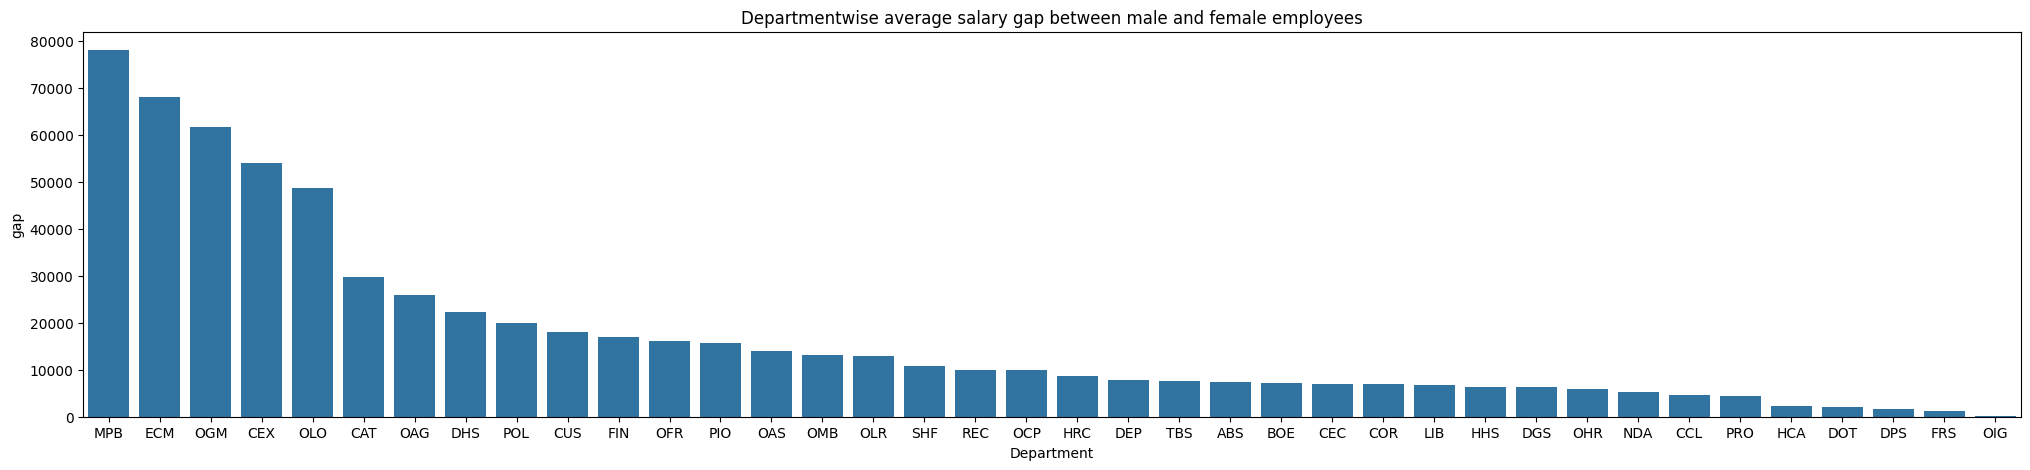

In [90]:
dep_g_avg_sal_no_null = dep_g_avg_sal_no_null.reset_index()
dep_g_avg_sal_gap = dep_g_avg_sal_no_null[['Department','gap']]
dep_g_avg_sal_gap['gap'] = dep_g_avg_sal_gap['gap'].abs()
dep_g_avg_sal_gap = dep_g_avg_sal_gap.sort_values(by = 'gap', ascending = False).set_index('Department')

# Visual representation of the departmentwise average salary gap between male and female employees.
plt.figure(figsize=(25,5))
sns.barplot(x=dep_g_avg_sal_gap.index,y=dep_g_avg_sal_gap['gap'])
plt.title('Departmentwise average salary gap between male and female employees')
plt.show()

In [91]:
# Gender v/s average base salary

avg_base_sal_g = (employee_salaries.groupby('Gender')['Base_Salary'].mean()).round(2)
avg_base_sal_g

Gender
F    87940.26
M    92678.40
Name: Base_Salary, dtype: float64

<ipython-input-92-116b7f7ba550>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(avg_base_sal_g, palette = ['orange','royalblue'])


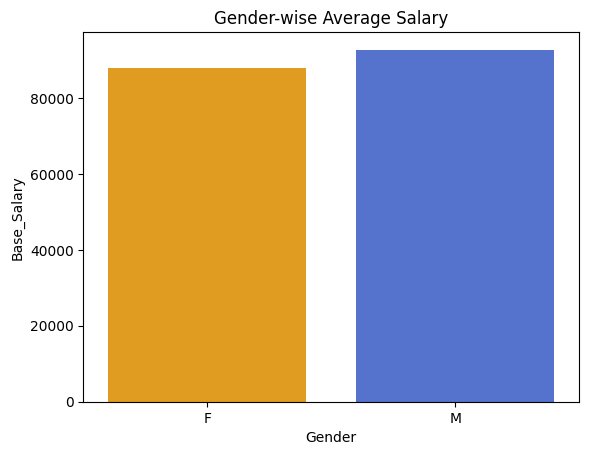

In [92]:
sns.barplot(avg_base_sal_g, palette = ['orange','royalblue'])
plt.title("Gender-wise Average Salary")
plt.show()

In [93]:
# calculation of difference between the average base salary of male and female employees.

(avg_base_sal_g['M']-avg_base_sal_g['F']).round(2)

4738.14

The above analysis indicates that,
 - The top departments with highest average basic salaries are 'IGR', 'ZAH', 'OLR', 'ELM', and 'NDA'.
 - Departments with lowest average basic salaries are 'LIB', 'ABS', 'CEC', 'OAS', and 'DOT'.
 - There is a negative correlation between the Average Base Salary and Employees Count i.e, more the number of employees, lesser the average salary.
 - The average base salary based on gender is highest in the case of male employees, however, the difference between the male and female is just Rupees.4738 only.
 - All department have atleast one female employees, however, department 'BOA', 'IGR', 'ORE', 'ZAH' do not have any male employees even though the employee count is more than 2.
 - Out of the total 38 departments having combination of both male and female employees, 15 departments have salary gap of male employees, and 23 departments have that of female employees.
 - 'MPB', 'ECM', 'OGM', 'CEX' AND 'OLO' departments are the top 5 departments with highest salary gap and department 'OIG' marks as the department with the lowest.
 - Due to the want of data, the reasons for the salary gap is not known. The general possibilities includes experience, qualification, job role etc.

In [94]:
# overtime v/s department

ot_dep = (employee_salaries.groupby('Department')['Overtime_Pay'].mean()).round(2).sort_values(ascending=False)
ot_dep_1 = ot_dep[ot_dep != 0]
ot_dep_2 = ot_dep[ot_dep == 0]
ot_dep_1

Department
FRS    22423.33
COR    21778.24
DOT    13398.21
POL     9523.83
DGS     6680.96
SHF     6197.91
CEC     4471.93
OAS     2642.45
ABS     2078.81
DEP     1713.72
HHS     1233.00
DPS     1004.07
TBS      810.54
CUS      506.05
REC      489.48
HRC      393.28
PIO      347.07
BOE      325.64
FIN      206.54
BOA      138.25
OLR       71.48
HCA       59.85
DHS       55.88
OHR       50.71
CCL       25.65
CAT       24.28
PRO       16.93
CEX       14.36
OMB        8.36
LIB        1.58
Name: Overtime_Pay, dtype: float64

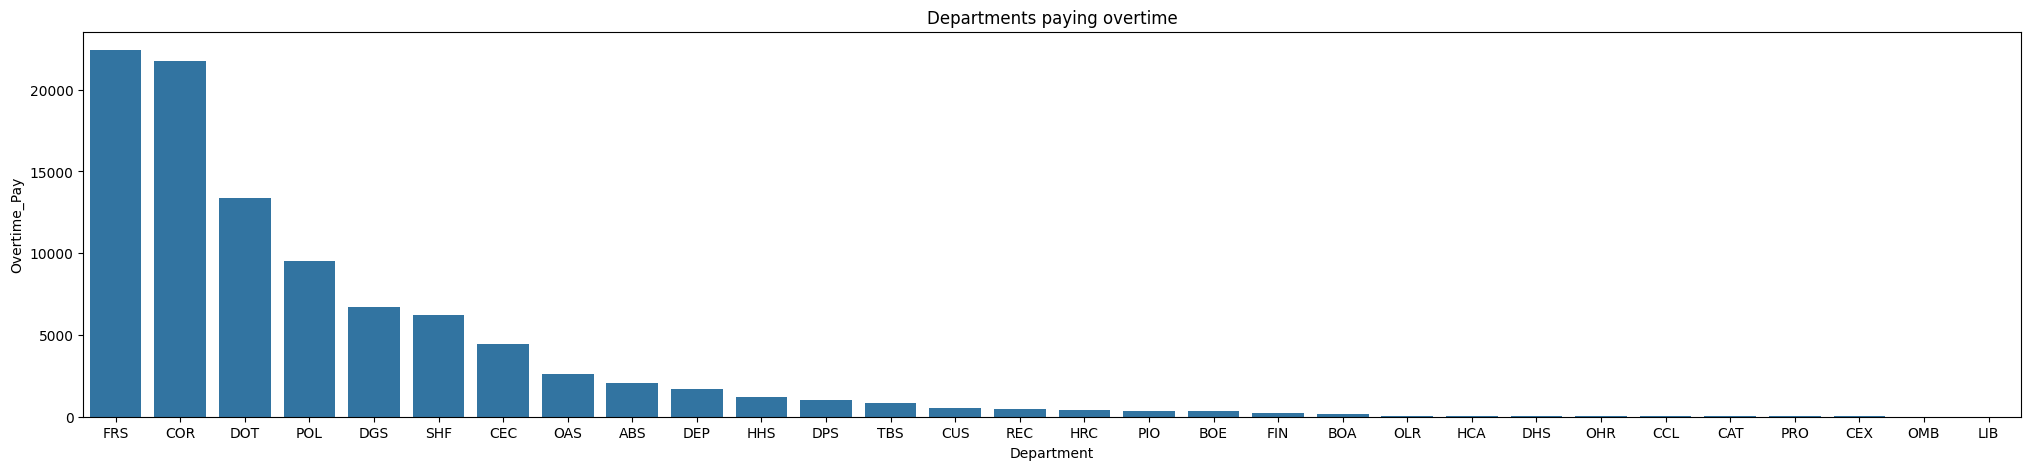

In [95]:
plt.figure(figsize = (25,5))
sns.barplot(ot_dep_1)
plt.title("Departments paying overtime")
plt.show()

In [96]:
# 'FRS' and 'COR' paying highest overtime charges.

In [97]:
employee_count.rank(ascending=False).loc[['FRS','COR']]

Department
FRS    3.0
COR    5.0
Name: count, dtype: float64

In [98]:
ot_dep_2

Department
OIG    0.0
OLO    0.0
OGM    0.0
OFR    0.0
ORE    0.0
OCP    0.0
OAG    0.0
NDA    0.0
MPB    0.0
IGR    0.0
ECM    0.0
ZAH    0.0
Name: Overtime_Pay, dtype: float64

Observation on the above analysis reveals that,
  - even though 'FRS' and 'COR' are ranked 3 and 5 in terms of departments having highest employees, they are also the departments paying highest overtime pay.
  - Department 'OIG', 'OLO', 'OGM', 'OFR', 'ORE', 'OCP', 'OAG', 'NDA', 'MPB', 'IGR', 'ECM', 'ZAH' are the departments which do not pay any overtime charges.

In [99]:
# Gender v/s overtime

ot_g = employee_salaries[['Gender','Overtime_Pay']][employee_salaries['Overtime_Pay'] > 0]
ot_g.head()

,Gender,Overtime_Pay
4,F,456.68
5,F,518.80
6,F,549.20
7,M,1187.06
10,F,11870.82


<ipython-input-100-53fc7893236c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ot_g['Gender'].value_counts(),palette = ['royalblue','Orange'])


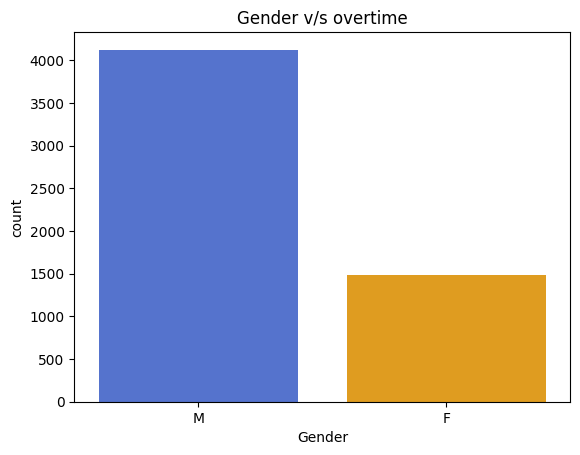

In [100]:
plt.figure()
sns.barplot(ot_g['Gender'].value_counts(),palette = ['royalblue','Orange'])
plt.title("Gender v/s overtime")
plt.show()

In [101]:
total = ot_g['Gender'].count()
percent = (ot_g['Gender'].value_counts()/total*100)
percent

Gender
M    73.524692
F    26.475308
Name: count, dtype: float64

The above analysis reveals that,
  - Out of the total number of overtime employees, 74% are male employees.
  - with only 26%, female employees are less likely to choose overtime works.

In [102]:
# Longevity Analysis

long_avg_sal = (employee_salaries.groupby('Department')['Longevity_Pay'].mean()).round(2)
long_avg_sal = long_avg_sal.sort_values(ascending=False)
long_avg_sal_null = long_avg_sal[long_avg_sal <= 0]
long_avg_sal_1 = long_avg_sal[long_avg_sal > 0]
long_avg_sal_1

Department
POL    3289.86
FRS    2855.39
SHF    1890.97
HRC    1822.31
DGS    1462.20
COR    1372.36
DEP    1275.47
BOA    1221.88
TBS    1075.39
DPS    1071.97
HCA    1044.78
PRO    1005.85
OCP     977.22
LIB     973.98
HHS     964.13
CAT     857.29
BOE     827.70
CUS     732.14
REC     684.56
DHS     663.68
FIN     607.63
ABS     586.69
IGR     546.42
OHR     545.50
DOT     490.73
ZAH     399.07
OAG     382.16
PIO     315.43
OIG     302.52
ORE     266.04
CEX     265.46
CEC     253.63
OLR     251.62
OMB     217.40
NDA     169.89
OAS     124.37
CCL      87.80
OLO      45.27
Name: Longevity_Pay, dtype: float64

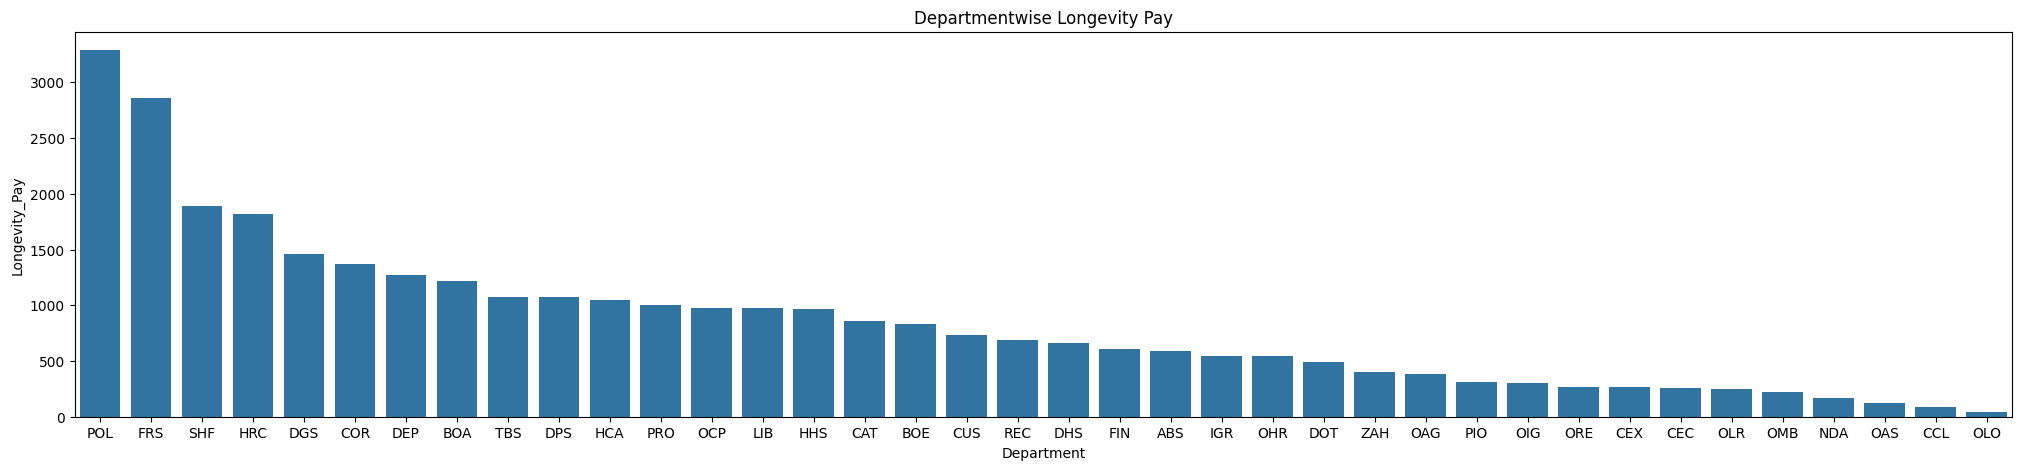

In [103]:
# Visualization of longevity pay
plt.figure(figsize=(25,5))
plt.title('Departmentwise Longevity Pay')
sns.barplot(long_avg_sal_1)
plt.show()

In [104]:
#departments with no longevity pay
long_avg_sal_null

Department
ECM    0.0
OGM    0.0
OFR    0.0
MPB    0.0
Name: Longevity_Pay, dtype: float64

In [105]:
# 'POL', 'FRS', 'SHF', 'HRC', 'DGS' are the departments with highest longevity pay.
employee_count.loc[['POL', 'FRS', 'SHF', 'HRC', 'DGS']]

Department
POL    1702
FRS    1361
SHF     184
HRC      11
DGS     390
Name: count, dtype: int64

In [106]:
employee_count.rank(ascending=False).loc[['POL', 'FRS', 'SHF', 'HRC', 'DGS']]

Department
POL     1.0
FRS     3.0
SHF    10.5
HRC    32.5
DGS     8.0
Name: count, dtype: float64

The above analysis reveals that -
 - 'POL', 'FRS', 'SHF', 'HRC', 'DGS' are the departments with highest longevity pay.
 - Department 'HRC', with only 11 employees on board, is the 4th highest longevity paying department.
 -'ECM','OGM', 'OFR', 'MPB' departments do not pay any longevity pay.

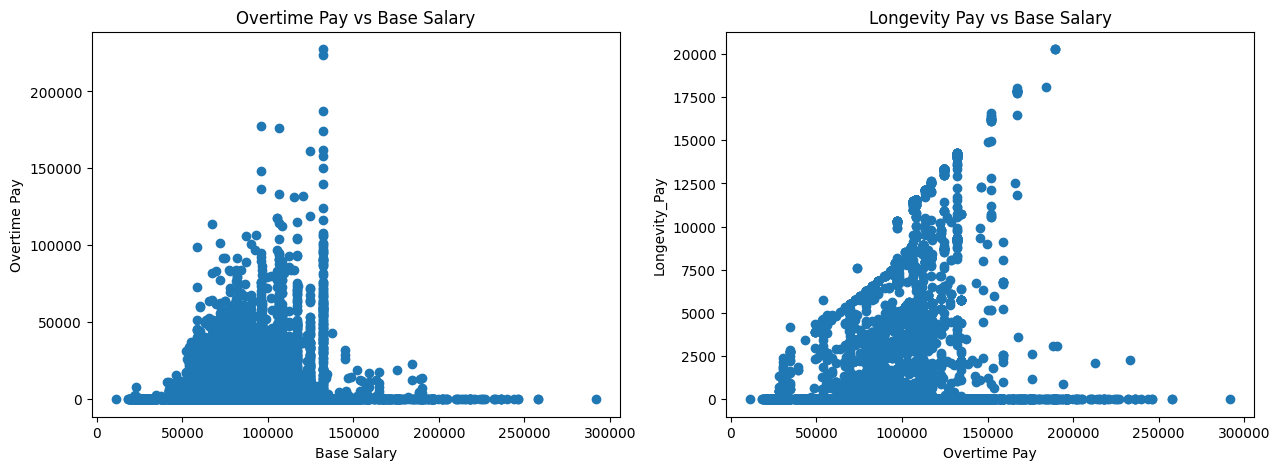

In [122]:
# Understanding the correlation between Overtime_Pay, Longevity_Pay and Base_Salary.

fig, axs = plt.subplots(1, 2,figsize=(15,5))

axs[0].scatter(employee_salaries['Base_Salary'], employee_salaries['Overtime_Pay'])
axs[0].set_title('Overtime Pay vs Base Salary')
axs[0].set_xlabel('Base Salary')
axs[0].set_ylabel('Overtime Pay')

axs[1].scatter(employee_salaries['Base_Salary'], employee_salaries['Longevity_Pay'])
axs[1].set_title('Longevity Pay vs Base Salary')
axs[1].set_xlabel('Overtime Pay')
axs[1].set_ylabel('Longevity_Pay')

plt.show()

In [130]:
# Calculation of correlation coefficient

print(f"Correlation Coefficient b/w Base Salary & Overtime Pay :{(employee_salaries['Base_Salary'].corr(employee_salaries['Overtime_Pay'],method = 'pearson')).round(4)}")
print(f"Correlation Coefficient b/w Base Salary & Longevity Pay :{(employee_salaries['Base_Salary'].corr(employee_salaries['Longevity_Pay'],method = 'pearson')).round(4)}")

Correlation Coefficient b/w Base Salary & Overtime Pay :0.0738
Correlation Coefficient b/w Base Salary & Longevity Pay :0.2955


The above analysis reveals that there is a slight upward trend between the data points in both the cases of Overtime Pay, and Longevity Pay, indicating that employees with higher base salary tends to receive higher Overtime Pay or Longevity Pay.

# **END**